## Embedding Generation and FAISS Vector Store


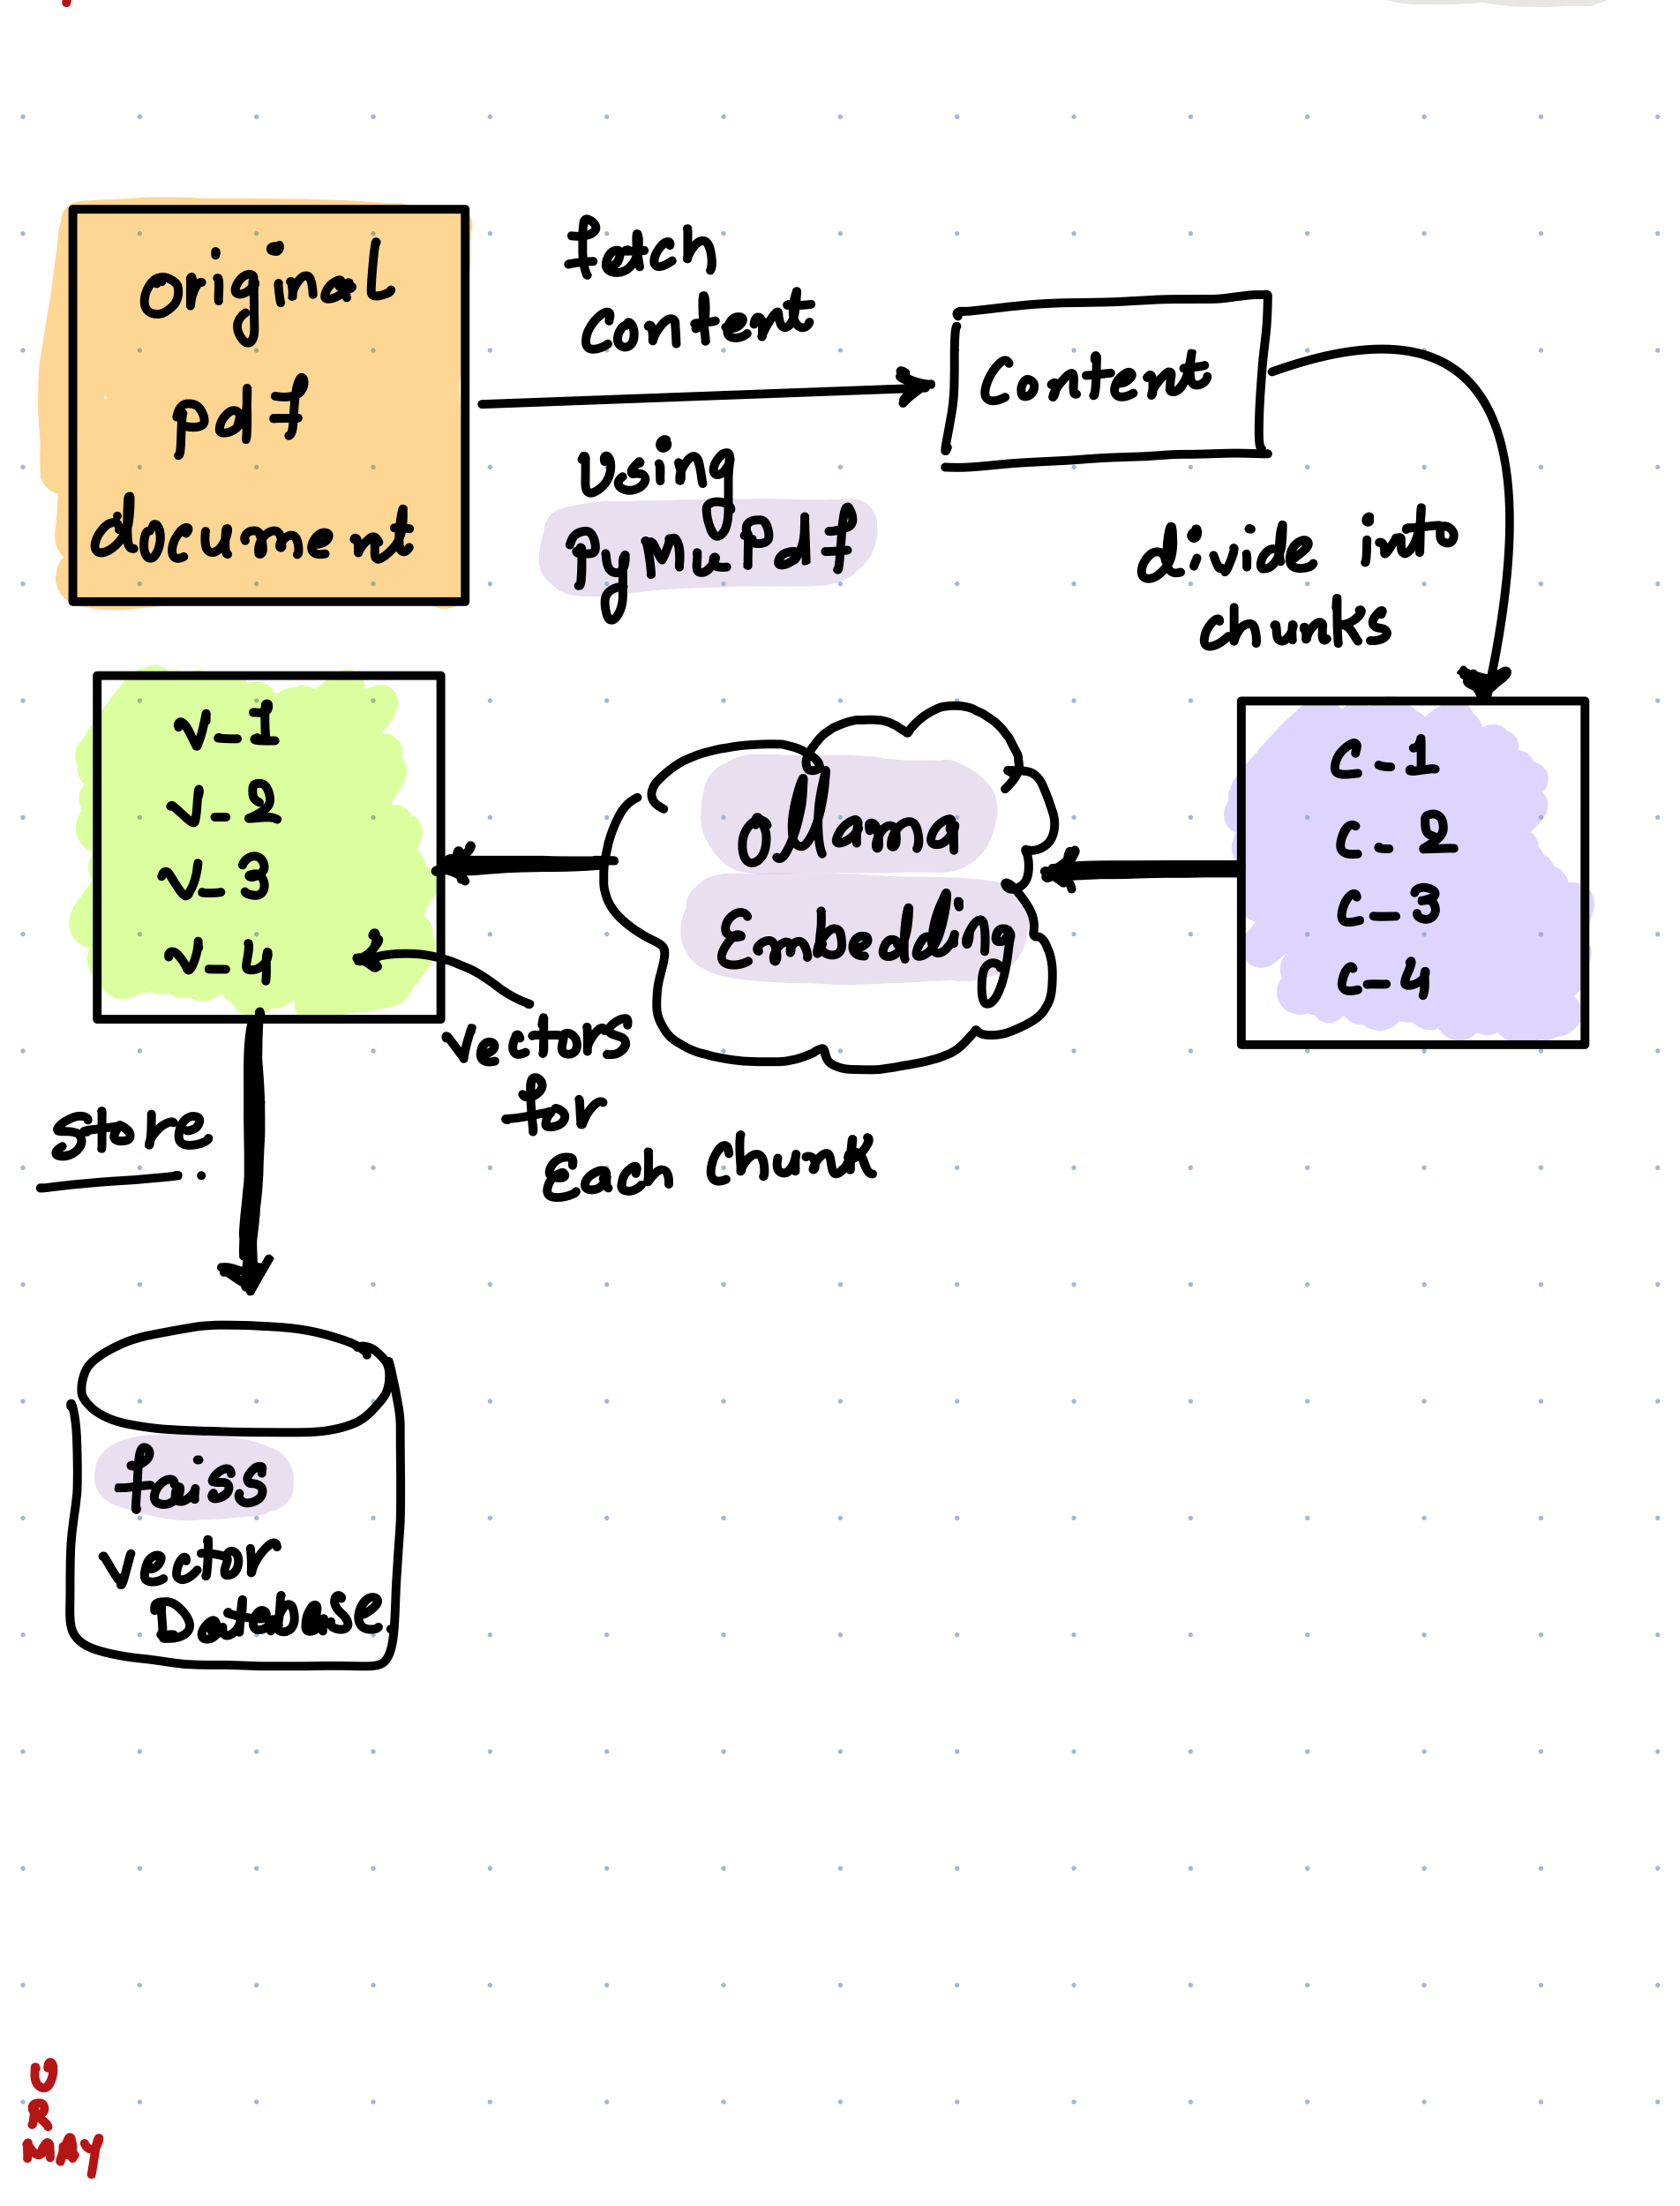

In [3]:
!pip install langchain_community
!pip install faiss-cpu


   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.5 MB 1.3 MB/s eta 0:00:02
   --- ------------------------------------ 0.2/2.5 MB 3.0 MB/s eta 0:00:01
   ----- ---------------------------------- 0.4/2.5 MB 3.3 MB/s eta 0:00:01
   ------ --------------------------------- 0.4/2.5 MB 2.3 MB/s eta 0:00:01
   ----------- ---------------------------- 0.7/2.5 MB 3.0 MB/s eta 0:00:01
   -------------- ------------------------- 0.9/2.5 MB 3.1 MB/s eta 0:00:01
   -------------------- ------------------- 1.3/2.5 MB 3.8 MB/s eta 0:00:01
   ------------------------ --------------- 1.6/2.5 MB 4.2 MB/s eta 0:00:01
   --------------------------- ------------ 1.8/2.5 MB 4.1 MB/s eta 0:00:01
   --------------------------------- ------ 2.1/2.5 MB 4.5 MB/s eta 0:00:01
   ------------------------------------- -- 2.4/2.5 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 2.5/2.5 MB 4.5 MB/s eta 0:00:00
   ----------------

In [27]:
!pip install tiktoken

   ---------------------------------------- 0.0/893.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/893.9 kB ? eta -:--:--
   ---------------------------------------- 10.2/893.9 kB ? eta -:--:--
    -------------------------------------- 20.5/893.9 kB 217.9 kB/s eta 0:00:05
   - ------------------------------------- 41.0/893.9 kB 279.3 kB/s eta 0:00:04
   ---- --------------------------------- 112.6/893.9 kB 595.3 kB/s eta 0:00:02
   --------- ---------------------------- 215.0/893.9 kB 935.2 kB/s eta 0:00:01
   --------------------- ------------------ 481.3/893.9 kB 1.9 MB/s eta 0:00:01
   ----------------------------------- ---- 788.5/893.9 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 893.9/893.9 kB 2.7 MB/s eta 0:00:00


In [13]:
!pip install PyMuPDF

   ---------------------------------------- 0.0/16.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/16.6 MB 1.1 MB/s eta 0:00:15
   ---------------------------------------- 0.2/16.6 MB 2.1 MB/s eta 0:00:08
   - -------------------------------------- 0.4/16.6 MB 2.9 MB/s eta 0:00:06
   -- ------------------------------------- 0.8/16.6 MB 4.9 MB/s eta 0:00:04
   --- ------------------------------------ 1.2/16.6 MB 5.3 MB/s eta 0:00:03
   --- ------------------------------------ 1.5/16.6 MB 5.4 MB/s eta 0:00:03
   ---- ----------------------------------- 1.7/16.6 MB 5.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.9/16.6 MB 5.2 MB/s eta 0:00:03
   ---- ----------------------------------- 2.1/16.6 MB 5.0 MB/s eta 0:00:03
   ----- ---------------------------------- 2.3/16.6 MB 5.1 MB/s eta 0:00:03
   ----- ---------------------------------- 2.4/16.6 MB 4.9 MB/s eta 0:00:03
   ------ --------------------------------- 2.8/16.6 MB 5.0 MB/s eta 0:00:03
   ---

In [14]:
import os
import warnings
warnings.filterwarnings("ignore")


### Document Loader

In [20]:
### Read the list of PDFs in the dir

from langchain_community.document_loaders import PyMuPDFLoader
import os

pdfs = []
for root, dirs, files in os.walk(r"D:\Training\llm\data_1"):
    # print(root, dirs, files)
    for file in files:
        if file.endswith(".pdf"):
            pdfs.append(os.path.join(root, file))


In [21]:
docs = []
for pdf in pdfs:
    loader = PyMuPDFLoader(pdf)
    temp = loader.load()
    docs.extend(temp)

In [22]:
print(pdfs)

['D:\\Training\\llm\\data_1\\1. Analysis of Actual Fitness Supplement.pdf', 'D:\\Training\\llm\\data_1\\2. High Prevalence of Supplement Intake.pdf']


In [23]:
len(docs)

26

In [24]:
print(docs[0].page_content)
docs

Citation: Espeño, P.R.; Ong, A.K.S.;
German, J.D.; Gumasing, M.J.J.; Casas,
E.S. Analysis of Actual Fitness
Supplement Consumption among
Health and Fitness Enthusiasts. Foods
2024, 13, 1424. https://doi.org/
10.3390/foods13091424
Academic Editors: Ilija Djekic
and Nada Smigic
Received: 30 March 2024
Revised: 15 April 2024
Accepted: 18 April 2024
Published: 6 May 2024
Copyright: © 2024 by the authors.
Licensee MDPI, Basel, Switzerland.
This article is an open access article
distributed
under
the
terms
and
conditions of the Creative Commons
Attribution (CC BY) license (https://
creativecommons.org/licenses/by/
4.0/).
foods
Article
Analysis of Actual Fitness Supplement Consumption among
Health and Fitness Enthusiasts
Paolo Renzo Espeño 1, Ardvin Kester S. Ong 1,2,*
, Josephine D. German 1
, Ma. Janice J. Gumasing 3
and Ethan S. Casas 1
1
School of Industrial Engineering and Engineering Management, Mapúa University, 658 Muralla St.,
Intramuros, Manila 1002, Philippines
2
E.T. Yuchengo Scho

[Document(metadata={'producer': 'iLovePDF', 'creator': '', 'creationdate': '', 'source': 'D:\\Training\\llm\\data_1\\1. Analysis of Actual Fitness Supplement.pdf', 'file_path': 'D:\\Training\\llm\\data_1\\1. Analysis of Actual Fitness Supplement.pdf', 'total_pages': 15, 'format': 'PDF 1.7', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'moddate': '2024-10-21T11:38:50+00:00', 'trapped': '', 'modDate': 'D:20241021113850Z', 'creationDate': '', 'page': 0}, page_content='Citation: Espeño, P.R.; Ong, A.K.S.;\nGerman, J.D.; Gumasing, M.J.J.; Casas,\nE.S. Analysis of Actual Fitness\nSupplement Consumption among\nHealth and Fitness Enthusiasts. Foods\n2024, 13, 1424. https://doi.org/\n10.3390/foods13091424\nAcademic Editors: Ilija Djekic\nand Nada Smigic\nReceived: 30 March 2024\nRevised: 15 April 2024\nAccepted: 18 April 2024\nPublished: 6 May 2024\nCopyright: © 2024 by the authors.\nLicensee MDPI, Basel, Switzerland.\nThis article is an open access article\ndistributed\nunder\nthe

### Document Chunking

In [25]:
from langchain_text_splitters import  RecursiveCharacterTextSplitter


text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000)
chunks = text_splitter.split_documents(docs)

In [28]:
import tiktoken


encoding = tiktoken.encoding_for_model("gpt-4o-mini")
len(encoding.encode(chunks[0].page_content)), len(encoding.encode(chunks[1].page_content)), len(encoding.encode(docs[1].page_content))

(294, 219, 922)

### Document Vector Embedding

In [29]:
from langchain_ollama import OllamaEmbeddings

import faiss
from langchain_community.vectorstores import FAISS 
from langchain_community.docstore.in_memory import InMemoryDocstore

In [32]:
embeddings = OllamaEmbeddings(model='mxbai-embed-large', base_url='http://localhost:11434')

In [33]:
vector = embeddings.embed_query("Hello World")

In [34]:
len(vector)
index = faiss.IndexFlatL2(len(vector))
index.ntotal, index.d

(0, 1024)

In [35]:
vector_store = FAISS(
    embedding_function=embeddings,
    index=index,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={},
)

In [36]:
vector_store.index.ntotal, vector_store.index.d

(0, 1024)

In [37]:
ids = vector_store.add_documents(documents=chunks)

In [38]:
len(ids), vector_store.index.ntotal

(110, 110)

In [39]:
import os
os.getcwd()

'C:\\Users\\Urmay Shah'

In [40]:
### Retreival
question = "how to gain muscle mass?"
docs = vector_store.search(query=question, k=5, search_type="similarity")

In [41]:
docs

[Document(id='c18daa91-8bbc-4cd6-83a4-e08a53a56e5c', metadata={'producer': 'iLovePDF', 'creator': '', 'creationdate': '', 'source': 'D:\\Training\\llm\\data_1\\1. Analysis of Actual Fitness Supplement.pdf', 'file_path': 'D:\\Training\\llm\\data_1\\1. Analysis of Actual Fitness Supplement.pdf', 'total_pages': 15, 'format': 'PDF 1.7', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'moddate': '2024-10-21T11:38:50+00:00', 'trapped': '', 'modDate': 'D:20241021113850Z', 'creationDate': '', 'page': 0}, page_content='acids than traditional protein sources. Its numerous benefits have made it a popular choice\nfor snacks and drinks among consumers [3]. Another widely embraced supplement is\ncaffeine, which is found in many sports and food supplements. Caffeine reduces perceived\neffort, minimizes fatigue and pain, and proves to be effective for endurance and high-\nintensity activities, which is the choice of consumers [4].\nCreatine monohydrate is another well-known supplement used t

In [42]:
db_name = r"D:\Training\training_sample_db_store"

vector_store.save_local(db_name)